<AxesSubplot:>

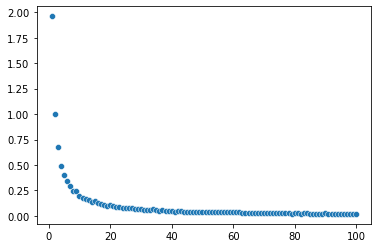

In [116]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.random.seed = 42

n_samples = 1000
variance = np.zeros(100)
for i in range(1, 101):
    samples = np.random.randint(1, 6, size=(n_samples, i))
    mean = np.mean(samples, axis=1)
    variance[i-1] = np.var(mean)

sns.scatterplot(np.arange(1, 101), variance)

0.10591605540664756
0.10179961961743621
0.10494181806656079
0.09707846994874489
0.0980056016484239
0.0981648596697058
0.09496123761692482
0.09423137637669012
0.09939846459916842
0.09832326713430097


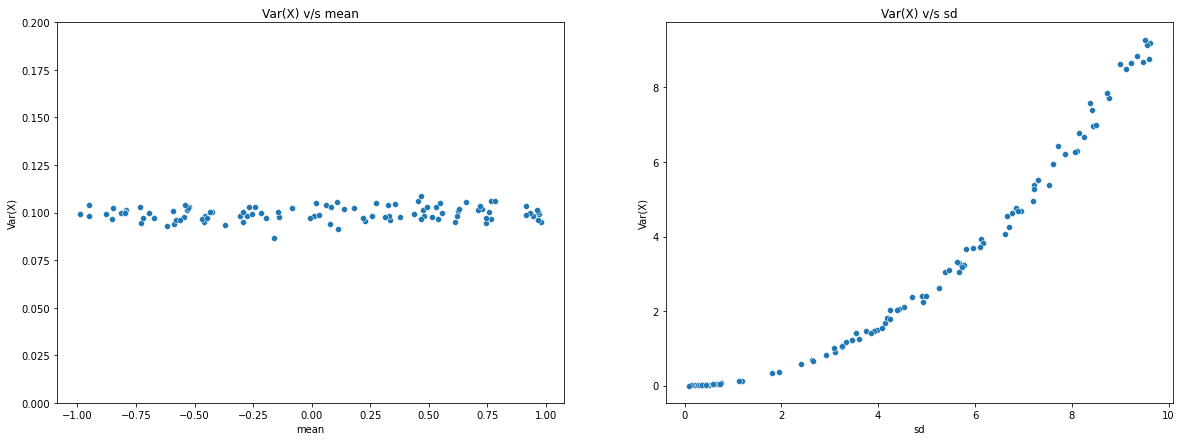

In [118]:
size = 100

variance_variable_mean = np.zeros(size+1)
variance_variable_sd = np.zeros(size+1)

var_mean_range = np.random.uniform(-1, 1, size+1)
var_sd_range = np.random.uniform(0, 10, size+1)

for id, i in enumerate(var_mean_range):
    # samples for variable mean and fixed sd
    samples_variable_mean = np.random.normal(loc=i, scale=1.0, size=(1000, 10))
    mean_variable_mean = np.mean(samples_variable_mean, axis=1)
    variance_variable_mean[id] = np.var(mean_variable_mean, )
    if id<10:
        print(variance_variable_mean[id])

for id, i in enumerate(var_sd_range):
    # samples for fixed mean and variable sd
    samples_variable_sd = np.random.normal(loc=0.0, scale=i, size=(1000, 10))
    mean_variable_sd = np.mean(samples_variable_sd, axis=1)
    variance_variable_sd[id] = np.var(mean_variable_sd)

fig, axs = plt.subplots(figsize=(20, 7), ncols=2)

sns.scatterplot(var_mean_range, variance_variable_mean, ax=axs[0])
axs[0].title.set_text('Var(X) v/s mean')
axs[0].set_xlabel('mean')
axs[0].set_ylabel('Var(X)')
axs[0].set_ylim((0.0, 0.2))

sns.scatterplot(var_sd_range, variance_variable_sd, ax=axs[1])
axs[1].title.set_text('Var(X) v/s sd')
axs[1].set_xlabel('sd')
axs[1].set_ylabel('Var(X)')

fig.show()

In [120]:
from scipy.stats import norm
from math import sqrt

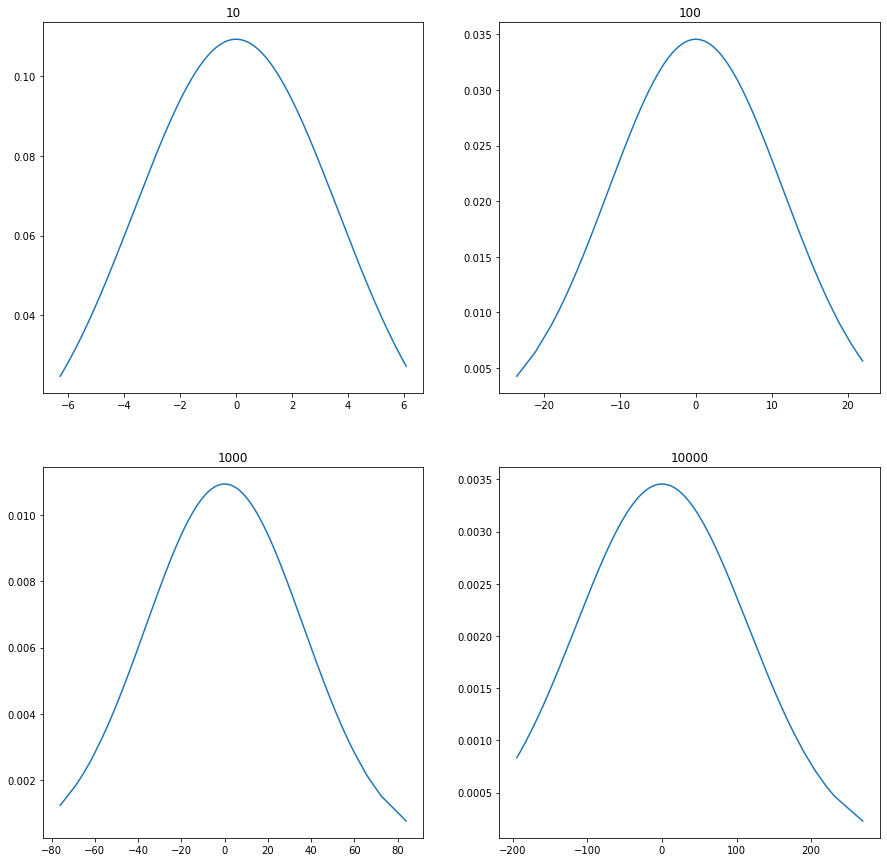

In [122]:
n = np.array([10, 100, 1000, 10000])
D_sum = np.empty(shape=(0, 0))

for size_idx in np.arange(n.shape[0]):
    D = np.random.uniform(-1, 1, size=(10000, n[size_idx]))
    if size_idx == 0:
        D_sum = np.sum(D, axis=1)
    else:
        D_sum = np.vstack([D_sum, np.sum(D, axis=1)])    

fig, axs = plt.subplots(figsize=(15, 15), nrows=2, ncols=2)
counter = 0
for i in np.arange(2):
    for j in np.arange(2):
        sns.lineplot(x=D_sum[counter,:], y=norm.pdf(D_sum[counter,:], (n[counter]*(-2+2)/2), (sqrt( ( (-2-2)**2)/12) )*sqrt(n[counter])), ax=axs[i, j])
        axs[i, j].set_title(f'{n[counter]}')
        counter += 1

# Chi Square test

### Using dice throw example (Discrete sample example)

#### We know that the population mean of dice throws will be:
### $\frac{\sum_{i=1}^6  i}{6}$
Hence, $\mu$ = 3.5

#### We also know that Standard Deviation will be:
### $\sqrt{\frac{\sum_{i=1}^6(x_i - \mu)}{6-1}}$
Hence, $\sigma$ = 1.707825127659933

In [124]:
pop_mean = 3.5
pop_std = 1.707825127659933
pop_var = pop_std**2

In [126]:
samples = np.random.randint(1, 6+1, size=(1000, 3))
print(samples[:10])
samples.shape

[[3 2 2]
 [4 6 1]
 [1 1 2]
 [6 5 2]
 [2 6 2]
 [1 4 2]
 [1 4 2]
 [2 3 3]
 [6 6 6]
 [2 2 1]]


(1000, 3)

In [128]:
sample_mean_dist = np.mean(samples, axis=1)
sample_var_dist = np.var(samples, axis=1)
sample_std_dist = sample_var_dist**0.5

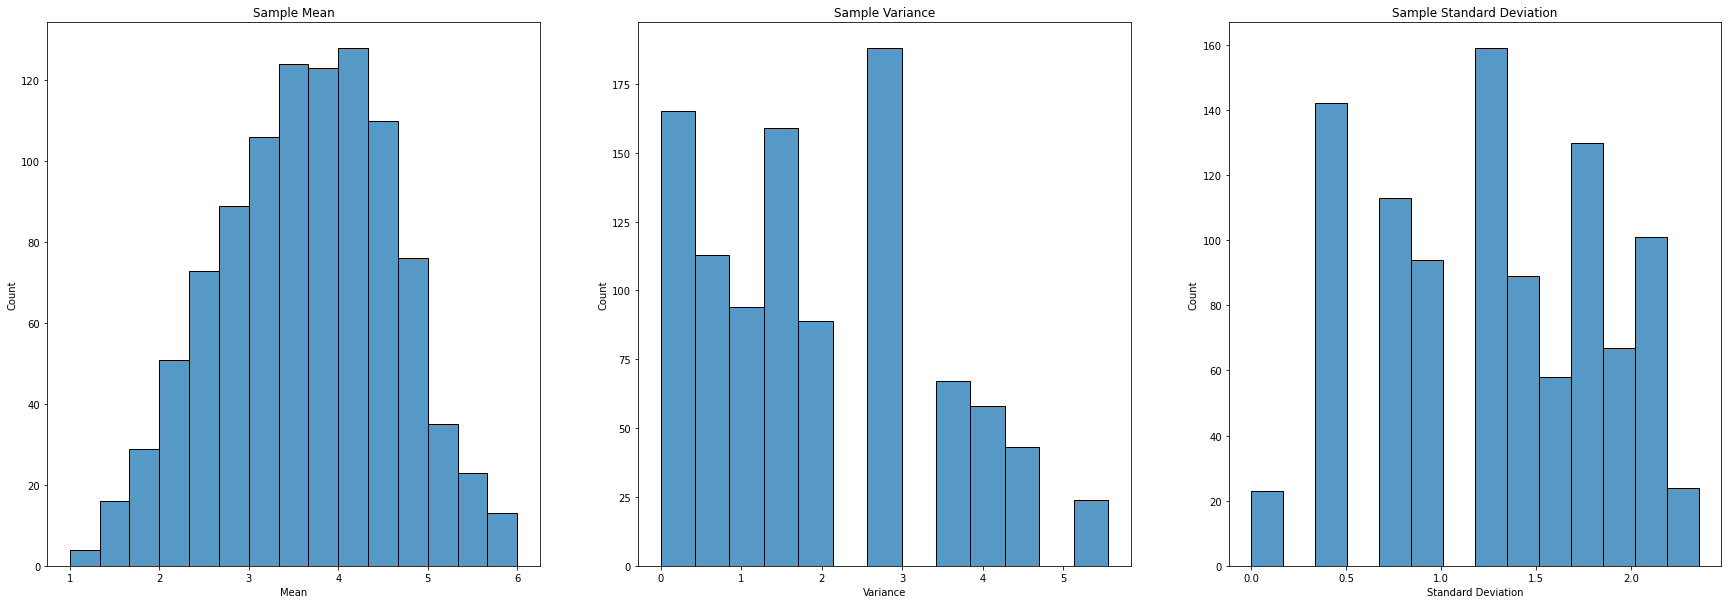

In [130]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=sample_mean_dist, ax=axs[0])
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=sample_var_dist, ax=axs[1])
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=sample_std_dist, ax=axs[2])
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

From *Central Limit Theorem*, we already knew that the sample means distribution will be a **Normal Distribution**
<br>Now, We have to gain insights about the ***sample variance distribution*** 
<br><br>
#### But, first lets see the whether the below given relation  holds or not: 
$E[S^2] = \sigma^2$

In [132]:
expected_sample_variance = np.mean(sample_var_dist)
expected_sample_variance

1.963111111111111

In [134]:
pop_var

2.9166666666666665

Now, lets look at at the observations:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

<br>But,we cannot say for sure since we tried this using only 1000 samples.<br>Let's, try this using $10^6$ samples.

In [136]:
large_samples = np.random.randint(1, 6+1, size=(10**6, 3))
print(large_samples[:10])
large_samples.shape 

[[3 2 2]
 [2 1 6]
 [1 6 6]
 [3 4 1]
 [5 1 4]
 [4 1 4]
 [6 2 5]
 [6 2 2]
 [6 6 2]
 [5 3 1]]


(1000000, 3)

In [138]:
large_sample_mean_dist = np.mean(large_samples, axis=1)
large_sample_var_dist = np.var(large_samples, axis=1)
large_sample_std_dist = large_sample_var_dist**0.5

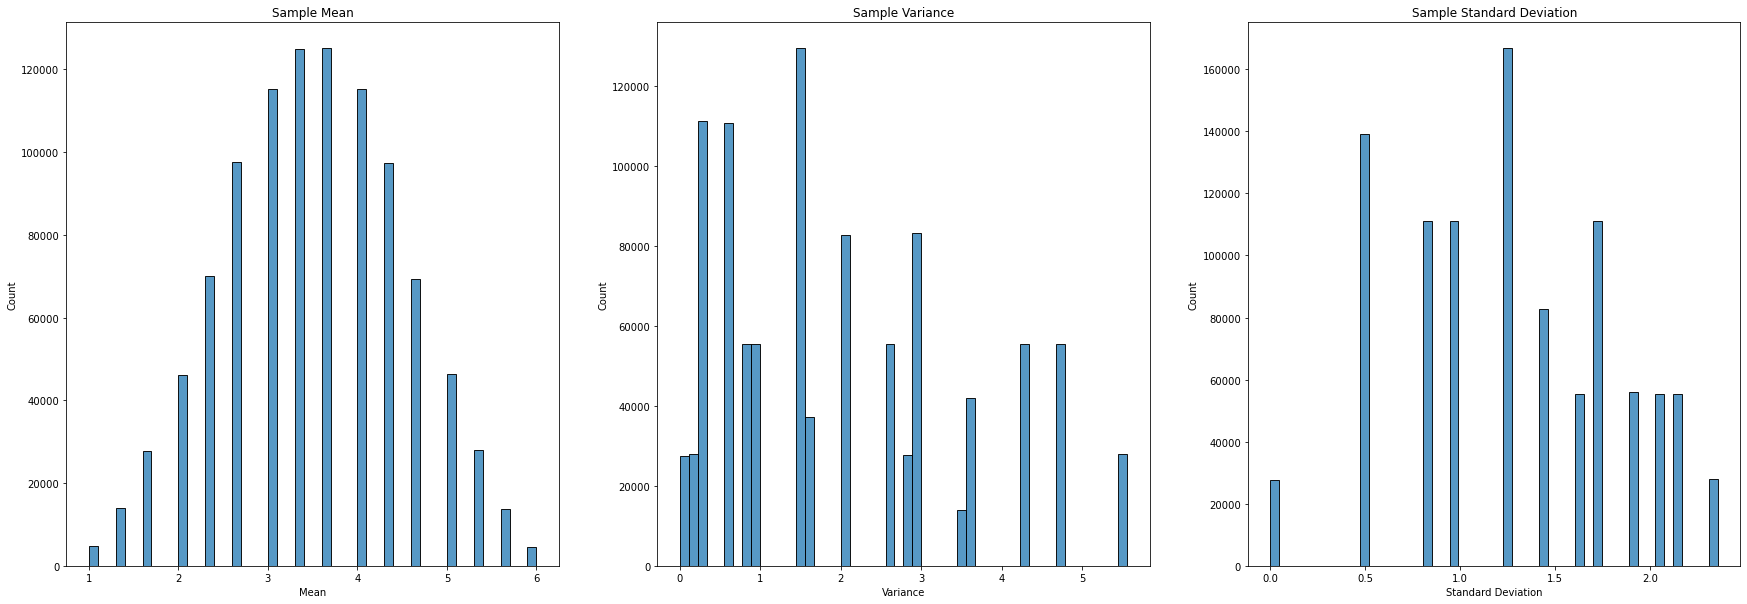

In [140]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=large_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=large_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance')
sns.histplot(x=large_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');

In [142]:
expected_large_sample_var = np.mean(large_sample_var_dist)
expected_large_sample_var

1.9449248888888884

As we can see, there is very slight change in $E(S^2)$. Hence, our previous observations stands true.
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$

### Random samples from standard normal dist. (Continous sample example) 

Since, it is a standard normal distribution, we know that:
<br>
$\mu=0$
<br>
$\sigma=1$

In [144]:
norm_samples = np.random.normal(size=(10**6, 3))
print(norm_samples[:10])
norm_samples.shape

[[-8.55785480e-02  1.07066300e+00  3.99610814e-01]
 [ 7.83825277e-01  1.60182208e+00 -4.54271379e-01]
 [ 2.24617060e-02  8.27828305e-01 -8.00656338e-01]
 [-8.44946319e-01  1.15798549e-02 -1.56926039e-01]
 [-2.02759230e+00  1.55949090e+00 -1.31767412e+00]
 [ 1.18557116e-03 -1.38653074e-01 -7.82570953e-01]
 [ 2.74697332e+00  5.37787580e-02 -1.32695026e+00]
 [-6.31139404e-01 -6.40930898e-01  3.28193938e-02]
 [ 9.96850908e-01  3.58771282e-01  1.82772995e+00]
 [-8.57697545e-01  2.75691408e-01 -3.91193071e-01]]


(1000000, 3)

In [146]:
norm_sample_mean_dist = np.mean(norm_samples, axis=1)
norm_sample_var_dist = np.var(norm_samples, axis=1)
norm_sample_std_dist = norm_sample_var_dist**0.5

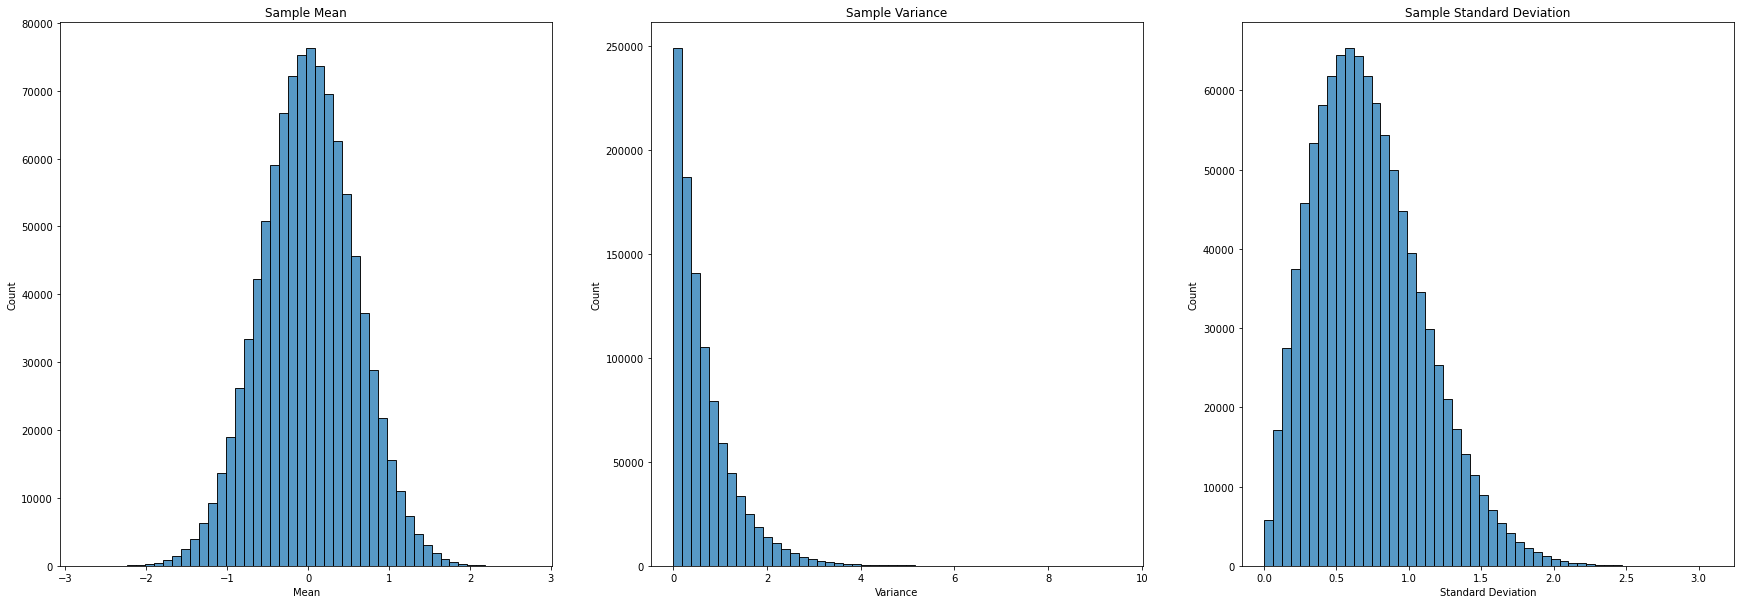

In [148]:
%matplotlib inline
fig, axs = plt.subplots(figsize=(30, 10), ncols=3)
sns.histplot(x=norm_sample_mean_dist, ax=axs[0], bins=50)
axs[0].set_title('Sample Mean')
axs[0].set_xlabel('Mean')
sns.histplot(x=norm_sample_var_dist, ax=axs[1], bins=50)
axs[1].set_title('Sample Variance')
axs[1].set_xlabel('Variance');
sns.histplot(x=norm_sample_std_dist, ax=axs[2], bins=50)
axs[2].set_title('Sample Standard Deviation')
axs[2].set_xlabel('Standard Deviation');


In [150]:
expected_norm_sample_var = np.mean(norm_sample_var_dist)
expected_norm_sample_var

0.6658216593657394

#### Even while using normal distribution we can see that the oberservations made using samples containing discrete values hold true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$ 

### Now, lets play with two value:
* $n$ = sample size
* $\mu$ = population mean

We will plot a graph for each $v/s$ $E(S^2)$
<br>
and compare with $\sigma^2$

### For $n$:
* $\mu$ = 0
* $\sigma$ = 1

In [152]:
import pandas as pd

In [154]:
variable_n = np.arange(1, 50+1)
variable_n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [156]:
variable_n_expected_var_series = pd.Series(index=variable_n)

In [158]:
for n in variable_n:
    variable_n_samples = np.random.normal(size=(10**6, n))
    variable_n_var_dist = np.var(variable_n_samples, axis=1)
    variable_n_expected_var_series[n] = np.mean(variable_n_var_dist)

variable_n_expected_var_series.iloc[:5]

1    0.000000
2    0.500289
3    0.667252
4    0.749778
5    0.799609
dtype: float64

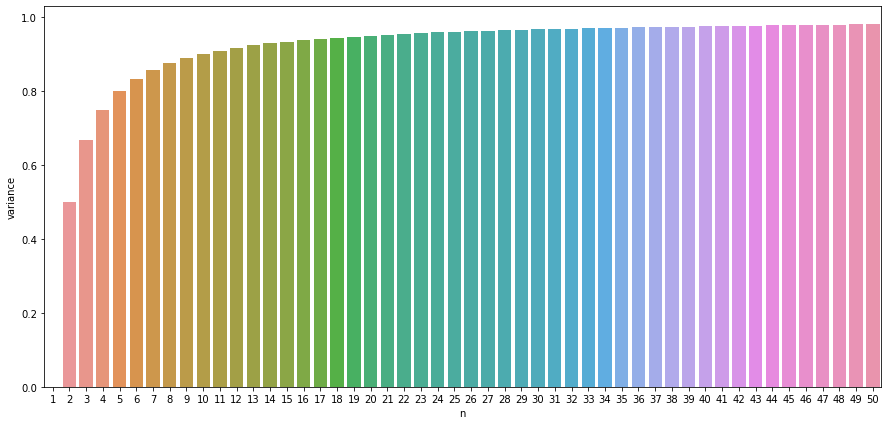

In [160]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('variance');

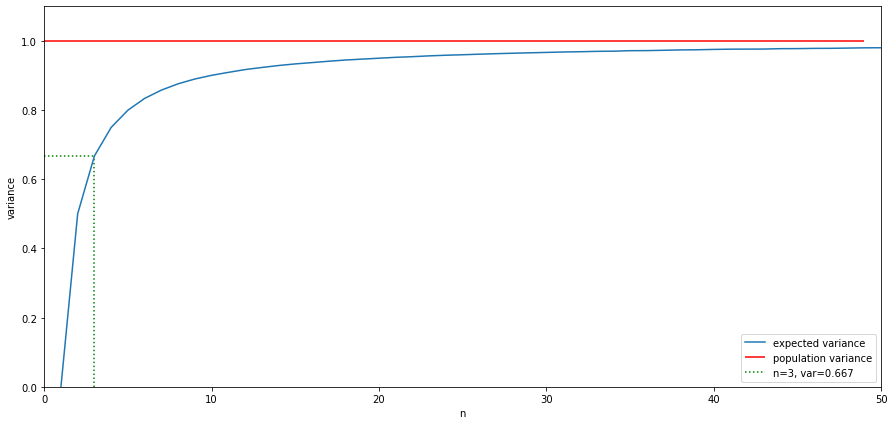

In [162]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

Look at the green dotted line, it represents n=3. We will be using it below, so remember it's variance (given in the legend).<br><br>
We can see that as we increase $n$, $E(S^2)$ is getting closer to $\sigma^2$ which is equal to 1. (but still $<$ $\sigma^2$)

### For $\mu$:
* $n$ = 3
* $\sigma$ = 1

In [164]:
n = 3

In [166]:
variable_mean = np.random.uniform(-10, 10+1, size=50)
variable_mean

array([-2.51068625, -4.25225456, 10.72276777, -8.40354934,  7.83346399,
       -3.45459583,  2.20978792, -3.57224907, -7.81632921, -7.78127581,
        2.15015069,  1.15338677,  9.56435012, -9.5939684 , -4.01211781,
        8.56142014, -4.43836411, -5.79838431, -2.69776937,  2.34893151,
       -9.73206643, -0.12215881,  1.9815927 ,  1.83101591, -4.91044277,
        8.44588283, -2.34094767, -3.78294932,  1.06498526,  6.19226055,
        2.18986168,  9.84752069,  1.0628906 ,  5.38079114, -2.4342104 ,
       -4.86607097,  9.73781968, -0.54930178,  6.82318231, -0.68953247,
       -8.06877639, -6.55653421, -9.28005643, -3.48594201, -2.49105795,
        8.55689459,  1.62338125, -8.85060449,  1.96232174, -4.60290603])

In [168]:
variable_mean_expected_var_series = pd.Series(index=variable_mean)

In [170]:
for mean in variable_mean:
    variable_mean_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_var_dist = np.var(variable_mean_samples, axis=1)
    variable_mean_expected_var_series[mean] = np.mean(variable_mean_var_dist)

variable_mean_expected_var_series.iloc[:5]

-2.510686     0.666235
-4.252255     0.666374
 10.722768    0.667083
-8.403549     0.666812
 7.833464     0.666305
dtype: float64

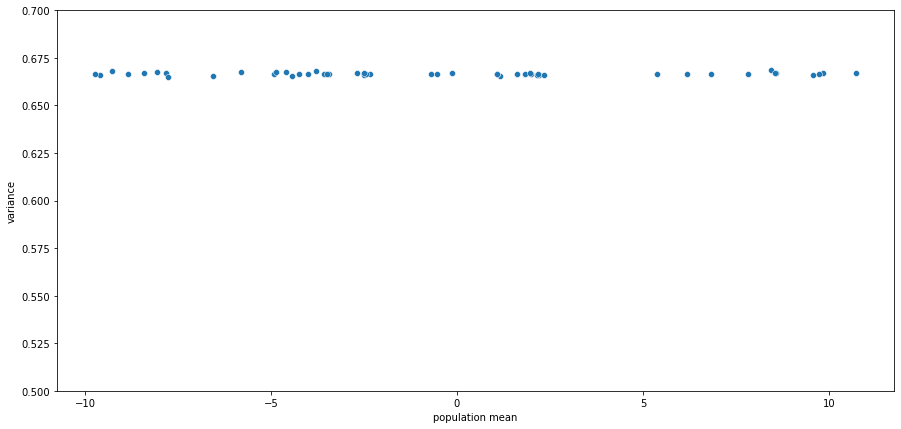

In [172]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('variance')
plt.ylim((0.5, 0.7));

The scatterplot for all  $\mu$ is showing approx. 1, so $\mu$ does not affect $E(S^2)$.
<br>
Let's zoom in on the data using lineplot.

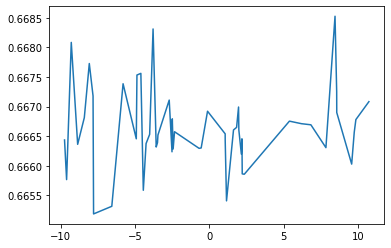

In [174]:
sns.lineplot(x=variable_mean, y=variable_mean_expected_var_series.values);

We can see from the lineplot that value of $E(S^2)$ lies in the very small interval (look at y-axis), which is a little far from 1.


### Conclusions from above two plots:

* As $n$ &#8594; $\infty$ $,$ $E(S^2)$ &#8594; 1
* $\mu$ has no effect on $E(S^2)$

### Also the two observations given below from the previous experiments stand true:
* $\sigma^2$ - $E[S^2]$ > 0
* $E[S^2]$ < $\sigma^2$   $(This$ $one$ $is$ $particularly$ $important)$

## NOW, what if I told you that the variance we have been using till now contains bias!!

You heard it right, and the reason $E(S^2)$ is under-estimating (always having lower value than) $\sigma^2$ is that ***bias***. 

Let's look at the reason, we will look at two reasons:
* Geometric reasoning
* Algebraic reasoning

* ### Geometric reasoning:


$E[S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$ <br><br>
$\sigma^2$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n}]$

Now, let's look at few examples:

### Example-1:<br><br>
We have population of containing $6$ numbers - 1, 2, 3, 4, 5, 6.<br> Now, we take a sample containing $3$ numbers - 1, 3, 4
<br><br> $\mu$ and $\bar{X}$ have been shown in the figure below.

<img src="../images/eg1.png"></img>

Now, let's recall the formulas of $\mu$ and $E[S^2]$.
* $\sigma$ is calculated by taking into account the distance between $X_i$ and $\mu$.
* $E[S^2]$ is calculated by taking into account the distance between $X_i$ and $\bar{X}$.

From the above given figure we can see that:
 * $\sum_{i=1}^n (X_i - \mu)$ will be greater than $\sum_{i=1}^n (X_i - \bar{X})$, this happens because $\mu$ is the population mean. Hence it is calculated<br>by taking into account even the end points of the entire population where as, $\bar{X}$ is only the mean of only the points contained <br>
 in that particular sample.
 <br><br><br>

### Example-2:<br><br>

<img src='../images/eg2.png'></img>

Here, $\bar{X}$ and $\mu$ are approximately the same. Hence, if we calculate $E[S^2]$, then we will see that it is close to $\sigma^2$.
<br><br><br>
Hence, by looking at the two examples, we can say that:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Average distance of samples from $\bar{X}$ $\le$ Average distance of samples from $\mu$***
<br><br><br>
### As a result, $E[S^2]$ $<$ $\sigma^2$<br>
I know you might be thinking where did $=$ go, when average distances can be equal why not $E[S^2]$ and $\sigma^2$ too. The reasoning will be<br>
provided at the end of this section. 

* ### Algebraic Reasoning:

Now, the only factor that can help us in understanding why $E[S^2]$ always underestimates $\sigma^2$ is the $\sum_{i=1}^n$ term in both the equations<br><br>
Let's start with $\sum_{i=1}^n (X_i - \mu)^2$ and try to get its expression in terms of $\sum_{i=1}^n (X_i - \bar{X})^2$.

$\sum_{i=1}^n (X_i - \mu)^2$ = $\sum_{i=1}^n ((X_i - \bar{X}) + (\bar{X} - \mu))^2$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n ((X_i - \bar{X})^2 + (\bar{X} - \mu)^2 + 2(X_i - \bar{X})(X_i - \mu))$   ,where, $\sum_{i=1}^n (X_i - \bar{X}) = 0$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\sum_{i=1}^n (X_i - \bar{X})^2 + \sum_{i=1}^n (\bar{X} - \mu)^2$

From the above calculation we can clearly see that, $\sum_{i=1}^n (X_i - \mu)^2 > \sum_{i=1}^n (X_i - \bar{X})^2$ <br><br>
Hence, $E[S^2]$ always underestimates $\sigma^2$

## Estimating $E[S^2]$: 
### Let's make an attempt to represent $E[S^2]$ in terms of $\sigma^2, n, \mu$.

We will start by finding the expected value of error:<br><br>
$E[\sigma^2 - S^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \mu)^2}{n} - \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}(\sum_{i=1}^n (X_i - \mu)^2 - \sum_{i=1}^n (X_i - \bar{X})^2)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\frac{1}{n}\sum_{i=1}^n (X_i - \mu)^2 - (X_i - \bar{X})^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{1}{n}\sum_{i=1}^n 2X_i(\bar{X} - \mu)]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + \frac{2(\bar{X} - \mu)}{n}\sum_{i=1}^n X_i]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 - \bar{X}^2 + 2(\bar{X} - \mu)\bar{X}]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[\mu^2 + \bar{X}^2 - 2\bar{X}\mu]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $E[(\bar{X} - \mu)^2]$<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= $\frac{\sigma^2}{n}$<br><br>
<br>
Now, since $\sigma^2$ is a constant, we write $E[\sigma^2 - S^2]$ = $\sigma^2 - E[S^2]$<br><br>
Hence, $E[S^2]$ = $\sigma^2$ - $\frac{\sigma^2}{n}$<br><br>
When we simplify the equation, we get:<br><br>
### $E[S^2]$ = $\frac{n-1}{n}\sigma^2$ &#8594; Now, we see why we didn't put = sign in $E[S^2]$ $<$ $\sigma^2$<br><br>
<br>Now, coming to out main topic ***Bias***:<br><br>
As we can, $E[S^2]$ is always less than $\sigma^2$, it is not sometimes greater or less than, but always less than. So, this systematic error is known as ***bias***.<br><br>

Inorder to remove this bias, we define an **unbiased** variance $E[S_{n-1}^2]$<br><br>
$E[S_{n-1}^2]$ = $\sigma^2$, (Let's call this **$eq.1$** for sometime) and <br><br>
to distinguish the usual **biased** variance, we denote it as $E[S_{n}^2]$<br><br>
$E[S_n^2]$ = $\frac{n-1}{n}\sigma^2$ (Let's call this **$eq.2$** for sometime)<br><br><br>
We know:<br><br>
$S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$, so using $eq.1$ & $eq.2$ (just recall properties of expectation)<br><br>
$E[S_{n-1}^2]$ = $E[\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}]$ and $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$<br><br><br>
* **Remember, the experiment where we plotted a graph between $E[S^2]$ and $n$, and I told you to note down the value for n=3. Now, put the value of n=3 in $eq.2$ and you will understand why we got that graph.**

### Now, that we have two type variances - $S_n^2$ and $S_{n-1}^2$, when to use which?<br><br>
### Answer: <br>
* When we want to calculate **$Population$ $Variance$**, then we will use **$S_n^2$**.
* When we want to calculate **$Sample$ $Variance$**, then we will use **$S_{n-1}^2$**.

Now, let's go to our example were everthing started:

### For $n$:

In [181]:
variable_n_unbiased_expected_var_series = pd.Series(index=variable_n)

In [195]:
for n in variable_n:
    variable_n_unbiased_samples = np.random.normal(size=(10**6, n))
    variable_n_unbiased_var_dist = np.var(variable_n_unbiased_samples, axis=1, ddof=1)      # ddof=1 tells numpy to calculate sample varance
    variable_n_unbiased_expected_var_series[n] = np.mean(variable_n_unbiased_var_dist)

variable_n_unbiased_expected_var_series.iloc[:5]

1         NaN
2    1.001048
3    0.998861
4    0.999204
5    0.999376
dtype: float64

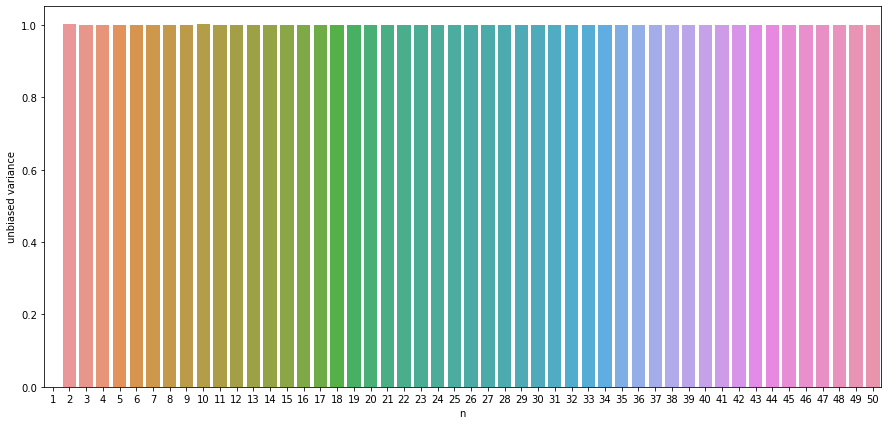

In [196]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.barplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values)
plt.xlabel('n')
plt.ylabel('unbiased variance');

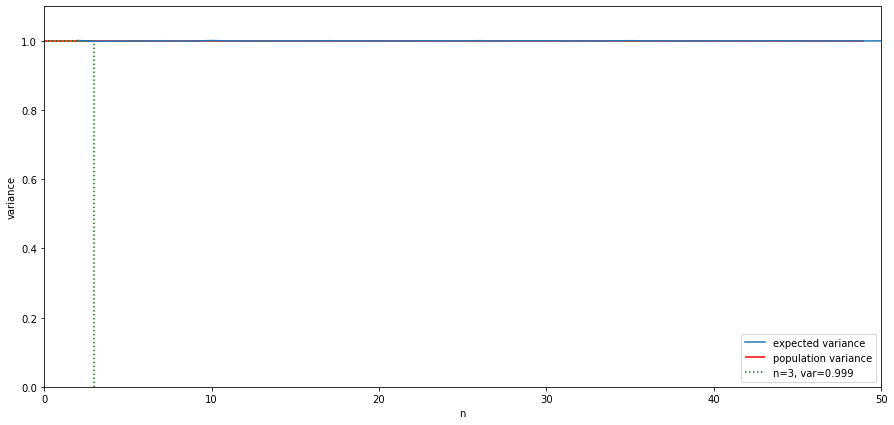

In [198]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.lineplot(x=variable_n, y=variable_n_unbiased_expected_var_series.values, label='expected variance')
plt.hlines(xmin=0, xmax=49, y=1.0, colors='red', label='population variance')
plt.xlabel('n')
plt.ylabel('variance')
plt.hlines(xmin=0, xmax=3, y=variable_n_unbiased_expected_var_series[3], colors='green', linestyles='dotted', label=f'n=3, var={variable_n_unbiased_expected_var_series[3]:.3f}')
plt.vlines(ymin=0, ymax=variable_n_unbiased_expected_var_series[3], x=3, colors='green', linestyles='dotted')
plt.xlim((0, 50))
plt.ylim((0, 1.1))
plt.legend(loc='lower right');

### For $\mu$:

In [192]:
variable_mean_unbiased_expected_var_series = pd.Series(index=variable_mean)

In [193]:
for mean in variable_mean:
    variable_mean_unbiased_samples = np.random.normal(loc=mean, size=(10**6, n))
    variable_mean_unbiased_var_dist = np.var(variable_mean_unbiased_samples, axis=1, ddof=1)
    variable_mean_unbiased_expected_var_series[mean] = np.mean(variable_mean_unbiased_var_dist)

variable_mean_unbiased_expected_var_series.iloc[:5]

-2.510686     0.999586
-4.252255     0.999771
 10.722768    1.000081
-8.403549     0.999987
 7.833464     0.999706
dtype: float64

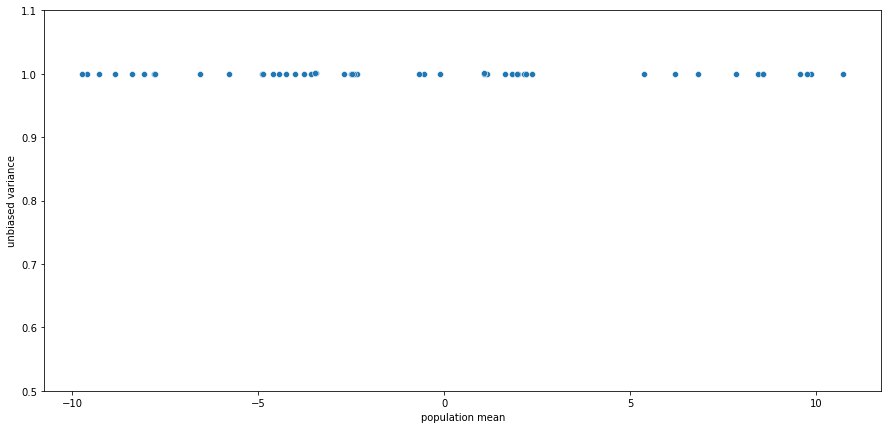

In [194]:
fig, axs = plt.subplots(figsize=(15, 7))
sns.scatterplot(x=variable_mean, y=variable_mean_unbiased_expected_var_series.values)
plt.xlabel('population mean')
plt.ylabel('unbiased variance')
plt.ylim((0.5, 1.1));

### *This time we can see that for all the graphs, the output is correct. (extremely close to population variance)* <br><br>
* For $variable$ $n$ and $\mu$, the output is a straight line $y$ = $1$ (approx.)

## ***Conclusion***:
* $E(S_n^2)$ & $E(S_{n-1}^2)$ are biased and unbiased estimates of $\sigma^2$ respectively.<br><br>
* If we want to calculate $\sigma^2$ (population variance), use $S_{n}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$<br><br>
* If we want to calculate $E[S^2]$ (expected sample variance), use $S_{n-1}^2$ = $\frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$